# Project Title: Zomato Restaurant Demand Forecasting

# Objective:
## The goal of this project is to develop a machine learning model that accurately predicts the number of food orders a restaurant will receive at a given time. This will help Zomato:
### ✅ Optimize restaurant inventory and staffing to reduce waste.
### ✅ Improve delivery efficiency by ensuring enough riders are available.
### ✅ Assist restaurants in better planning and resource management.
### ✅ Enhance customer experience by reducing delays in food preparation and delivery.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/Users/phanindrareddy/Downloads/ML/Zomato/Zomato.csv', on_bad_lines='skip')

In [3]:
df.head(5)

,user_id,name,email,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,...,cost,cuisine,lic_no,link,address,menu_id,f_id,price,food_item,veg_or_non_veg
0,49226,Teresa Garcia,crobertson@example.com,27,Male,Married,Self Employeed,25001 to 50000,Graduate,6,...,₹ 200,"Beverages,Pizzas",22122652000138,https://www.swiggy.com/restaurants/ab-foods-po...,"AB FOODS POINT, NEAR RISHI NARANG DENTAL CLINI...",mn0,fd0,40.0,Aloo Tikki Burger,Veg
1,5321,Donald Anderson,vritter@example.org,24,Male,Married,Employee,More than 50000,Post Graduate,3,...,₹ 100,Beverages,22121652000190,https://www.swiggy.com/restaurants/theka-coffe...,"theka coffee desi, sahtiya sadan road city",mn328,fd0,65.0,Aloo Tikki Burger,Veg
2,5321,Donald Anderson,vritter@example.org,24,Male,Married,Employee,More than 50000,Post Graduate,3,...,₹ 100,Beverages,22121652000190,https://www.swiggy.com/restaurants/theka-coffe...,"theka coffee desi, sahtiya sadan road city",mn449,fd0,65.0,Aloo Tikki Burger,Veg
3,91457,Debbie Leonard,paula51@example.com,24,Male,Married,Employee,More than 50000,Post Graduate,3,...,₹ 300,"Juices,Beverages",22121652000374,https://www.swiggy.com/restaurants/chawla-saab...,"CHAWLA SAAB THE JUICE MASTER, SAHITYA SADAN MA...",mn967,fd0,52.0,Aloo Tikki Burger,Veg
4,44025,Julie Gomez,jennifer16@example.com,29,Female,Married,Employee,More than 50000,Graduate,3,...,₹ 100,Indian,license,https://www.swiggy.com/restaurants/shri-balaji...,"Shri Balaji fast food and Variety store, oppos...",mn1522,fd0,30.0,Aloo Tikki Burger,Veg


In [4]:
df.shape

(261359, 29)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261359 entries, 0 to 261358
Data columns (total 29 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   user_id                     261359 non-null  int64  
 1   name                        261359 non-null  object 
 2   email                       261359 non-null  object 
 3   Age                         261359 non-null  int64  
 4   Gender                      261359 non-null  object 
 5   Marital Status              261359 non-null  object 
 6   Occupation                  261359 non-null  object 
 7   Monthly Income              261359 non-null  object 
 8   Educational Qualifications  261359 non-null  object 
 9   Family size                 261359 non-null  int64  
 10  order_date                  261359 non-null  object 
 11  sales_qty                   261359 non-null  int64  
 12  sales_amount                261359 non-null  int64  
 13  currency      

# Data Cleaning -> Starts

### Droped the unwanted Columns

In [6]:
df = df.drop(['email','sales_amount', 'currency' , 'r_id' , 'cost' , 'cuisine' , 'lic_no' , 'link' , 'address' , 'menu_id' , 'f_id' ], axis=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261359 entries, 0 to 261358
Data columns (total 18 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   user_id                     261359 non-null  int64  
 1   name                        261359 non-null  object 
 2   Age                         261359 non-null  int64  
 3   Gender                      261359 non-null  object 
 4   Marital Status              261359 non-null  object 
 5   Occupation                  261359 non-null  object 
 6   Monthly Income              261359 non-null  object 
 7   Educational Qualifications  261359 non-null  object 
 8   Family size                 261359 non-null  int64  
 9   order_date                  261359 non-null  object 
 10  sales_qty                   261359 non-null  int64  
 11  restaurant_name             261359 non-null  object 
 12  city                        261359 non-null  object 
 13  rating        

In [8]:
df.head(10)

,user_id,name,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,order_date,sales_qty,restaurant_name,city,rating,rating_count,price,food_item,veg_or_non_veg
0,49226,Teresa Garcia,27,Male,Married,Self Employeed,25001 to 50000,Graduate,6,2017-10-10,100,AB FOODS POINT,Abohar,--,Too Few Ratings,40.0,Aloo Tikki Burger,Veg
1,5321,Donald Anderson,24,Male,Married,Employee,More than 50000,Post Graduate,3,2018-04-06,1,theka coffee desi,Abohar,3.8,100+ ratings,65.0,Aloo Tikki Burger,Veg
2,5321,Donald Anderson,24,Male,Married,Employee,More than 50000,Post Graduate,3,2018-04-06,1,theka coffee desi,Abohar,3.8,100+ ratings,65.0,Aloo Tikki Burger,Veg
3,91457,Debbie Leonard,24,Male,Married,Employee,More than 50000,Post Graduate,3,2017-11-29,184,CHAWLA SAAB THE JUICE MASTER,Abohar,--,Too Few Ratings,52.0,Aloo Tikki Burger,Veg
4,44025,Julie Gomez,29,Female,Married,Employee,More than 50000,Graduate,3,2018-07-03,79,Shri Balaji fast food and Variety store,Abohar,--,Too Few Ratings,30.0,Aloo Tikki Burger,Veg
5,68553,Sara Blake,25,Male,Married,Self Employeed,More than 50000,Post Graduate,4,2019-08-01,5,Picado International Food,Abohar,--,Too Few Ratings,55.0,Aloo Tikki Burger,Veg
6,30521,Jacqueline Murphy,23,Male,Single,Student,No Income,Post Graduate,2,2019-02-08,1,Sagar Fast Food,Abohar,--,Too Few Ratings,45.0,Aloo Tikki Burger,Veg
7,30521,Jacqueline Murphy,23,Male,Single,Student,No Income,Post Graduate,2,2019-02-08,1,Sagar Fast Food,Abohar,--,Too Few Ratings,45.0,Aloo Tikki Burger,Veg
8,8084,Joshua Villarreal,22,Male,Single,Student,No Income,Graduate,3,2019-03-08,12,The Chocolate Room,Adityapur,3.7,20+ ratings,179.0,Aloo Tikki Burger,Veg
9,79770,Thomas Moore,32,Male,Married,Employee,25001 to 50000,Graduate,3,2018-05-29,4,The Chocolate Room,Adityapur,3.7,20+ ratings,179.0,Aloo Tikki Burger,Veg


In [9]:
df.duplicated().sum() 

32924

In [10]:
df = df.drop_duplicates()

In [11]:
df.duplicated().sum() 

0

In [12]:
df.head(5)

,user_id,name,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,order_date,sales_qty,restaurant_name,city,rating,rating_count,price,food_item,veg_or_non_veg
0,49226,Teresa Garcia,27,Male,Married,Self Employeed,25001 to 50000,Graduate,6,2017-10-10,100,AB FOODS POINT,Abohar,--,Too Few Ratings,40.0,Aloo Tikki Burger,Veg
1,5321,Donald Anderson,24,Male,Married,Employee,More than 50000,Post Graduate,3,2018-04-06,1,theka coffee desi,Abohar,3.8,100+ ratings,65.0,Aloo Tikki Burger,Veg
3,91457,Debbie Leonard,24,Male,Married,Employee,More than 50000,Post Graduate,3,2017-11-29,184,CHAWLA SAAB THE JUICE MASTER,Abohar,--,Too Few Ratings,52.0,Aloo Tikki Burger,Veg
4,44025,Julie Gomez,29,Female,Married,Employee,More than 50000,Graduate,3,2018-07-03,79,Shri Balaji fast food and Variety store,Abohar,--,Too Few Ratings,30.0,Aloo Tikki Burger,Veg
5,68553,Sara Blake,25,Male,Married,Self Employeed,More than 50000,Post Graduate,4,2019-08-01,5,Picado International Food,Abohar,--,Too Few Ratings,55.0,Aloo Tikki Burger,Veg


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 228435 entries, 0 to 261358
Data columns (total 18 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   user_id                     228435 non-null  int64  
 1   name                        228435 non-null  object 
 2   Age                         228435 non-null  int64  
 3   Gender                      228435 non-null  object 
 4   Marital Status              228435 non-null  object 
 5   Occupation                  228435 non-null  object 
 6   Monthly Income              228435 non-null  object 
 7   Educational Qualifications  228435 non-null  object 
 8   Family size                 228435 non-null  int64  
 9   order_date                  228435 non-null  object 
 10  sales_qty                   228435 non-null  int64  
 11  restaurant_name             228435 non-null  object 
 12  city                        228435 non-null  object 
 13  rating             

In [14]:
#order_date to date from object , rating to float from object
df['order_date'] = pd.to_datetime(df['order_date'])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 228435 entries, 0 to 261358
Data columns (total 18 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   user_id                     228435 non-null  int64         
 1   name                        228435 non-null  object        
 2   Age                         228435 non-null  int64         
 3   Gender                      228435 non-null  object        
 4   Marital Status              228435 non-null  object        
 5   Occupation                  228435 non-null  object        
 6   Monthly Income              228435 non-null  object        
 7   Educational Qualifications  228435 non-null  object        
 8   Family size                 228435 non-null  int64         
 9   order_date                  228435 non-null  datetime64[ns]
 10  sales_qty                   228435 non-null  int64         
 11  restaurant_name             228435 non-null 

## Replaced "--" values in rating to their mean and convert it into float data type

In [16]:
df['rating'] = df['rating'].replace("--", 2).astype(float)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 228435 entries, 0 to 261358
Data columns (total 18 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   user_id                     228435 non-null  int64         
 1   name                        228435 non-null  object        
 2   Age                         228435 non-null  int64         
 3   Gender                      228435 non-null  object        
 4   Marital Status              228435 non-null  object        
 5   Occupation                  228435 non-null  object        
 6   Monthly Income              228435 non-null  object        
 7   Educational Qualifications  228435 non-null  object        
 8   Family size                 228435 non-null  int64         
 9   order_date                  228435 non-null  datetime64[ns]
 10  sales_qty                   228435 non-null  int64         
 11  restaurant_name             228435 non-null 

### added new column using sales quantty and its price

In [18]:
df['Total_price'] = df['sales_qty'] * df['price']

In [19]:
df.isnull().sum()

user_id                       0
name                          0
Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
order_date                    0
sales_qty                     0
restaurant_name               0
city                          0
rating                        0
rating_count                  0
price                         1
food_item                     1
veg_or_non_veg                1
Total_price                   1
dtype: int64

### Droped null values as they are verry minimal

In [20]:
df = df.dropna()

### Standardize Text Data (Case Conversion, Stripping Spaces)

In [21]:
df = df.applymap(lambda x: x.strip().lower() if isinstance(x, str) else x)

In [22]:
df.shape

(228434, 19)

### Removing outliers

In [23]:
import numpy as np

def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

df = remove_outliers(df, 'price')
df = remove_outliers(df, 'sales_qty')

In [24]:
df.shape

(198772, 19)

In [25]:
df.head(2)

,user_id,name,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,order_date,sales_qty,restaurant_name,city,rating,rating_count,price,food_item,veg_or_non_veg,Total_price
1,5321,donald anderson,24,male,married,employee,more than 50000,post graduate,3,2018-04-06,1,theka coffee desi,abohar,3.8,100+ ratings,65.0,aloo tikki burger,veg,65.0
5,68553,sara blake,25,male,married,self employeed,more than 50000,post graduate,4,2019-08-01,5,picado international food,abohar,2.0,too few ratings,55.0,aloo tikki burger,veg,275.0


# Data Cleaning  Ends :) 

# Hypothesis Testing


### 1. Hypothesis: Higher-rated restaurants have higher average sales.
Null Hypothesis (H₀): The average sales quantity is the same for high-rated and low-rated restaurants.
Alternative Hypothesis (H₁): High-rated restaurants have significantly higher sales.
Test: Independent t-test (compare means of two groups).

In [26]:
from scipy.stats import ttest_ind

# Define groups
high_rated = df[df['rating'] >= 4.0]['sales_qty']
low_rated = df[df['rating'] < 4.0]['sales_qty']

# Perform t-test
t_stat, p_value = ttest_ind(high_rated, low_rated, equal_var=False)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Reject H₀: High-rated restaurants have significantly higher sales.")
else:
    print("Fail to reject H₀: No significant difference in sales based on ratings.")


T-statistic: -18.851972632025067, P-value: 4.358615136178273e-79
Reject H₀: High-rated restaurants have significantly higher sales.


### 2. Hypothesis: Customers with higher income spend more per order.
Null Hypothesis (H₀): Monthly income has no effect on spending per order.
Alternative Hypothesis (H₁): Higher income groups spend more per order.
Test: ANOVA (comparing means across multiple income groups).


In [27]:
from scipy.stats import f_oneway

# Create spending column
df['total_spent'] = df['sales_qty'] * df['price']

# Group data by income
income_groups = df.groupby('Monthly Income')['total_spent'].apply(list)

# Perform ANOVA test
f_stat, p_value = f_oneway(*income_groups)
print(f"F-statistic: {f_stat}, P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Reject H₀: Monthly income significantly impacts spending per order.")
else:
    print("Fail to reject H₀: No significant difference in spending across income groups.")

F-statistic: 29.238060803402647, P-value: 2.4305408726439884e-24
Reject H₀: Monthly income significantly impacts spending per order.


## Customer Behaviour

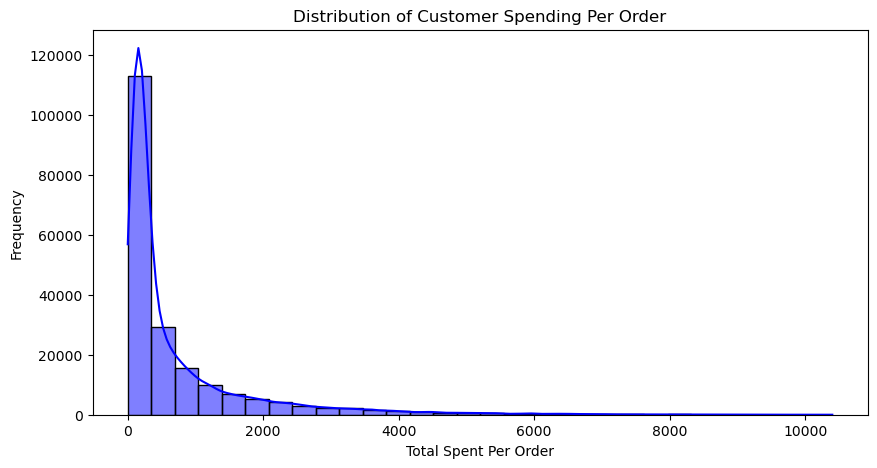

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a new column
df['total_spent'] = df['sales_qty'] * df['price']

# Plot spending distribution
plt.figure(figsize=(10,5))
sns.histplot(df['total_spent'], bins=30, kde=True, color='blue')
plt.xlabel("Total Spent Per Order")
plt.ylabel("Frequency")
plt.title("Distribution of Customer Spending Per Order")
plt.show()

## 2. Most Popular Food Items

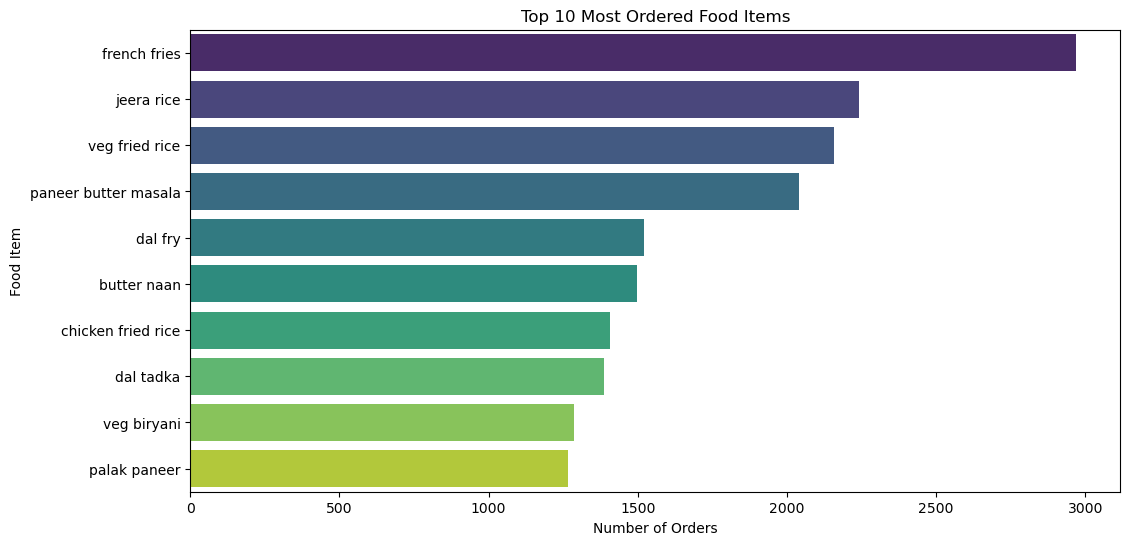

In [29]:
plt.figure(figsize=(12,6))
top_foods = df['food_item'].value_counts().head(10)
sns.barplot(x=top_foods.values, y=top_foods.index, palette="viridis")
plt.xlabel("Number of Orders")
plt.ylabel("Food Item")
plt.title("Top 10 Most Ordered Food Items")
plt.show()


## 3. Preferred Restaurant Choices

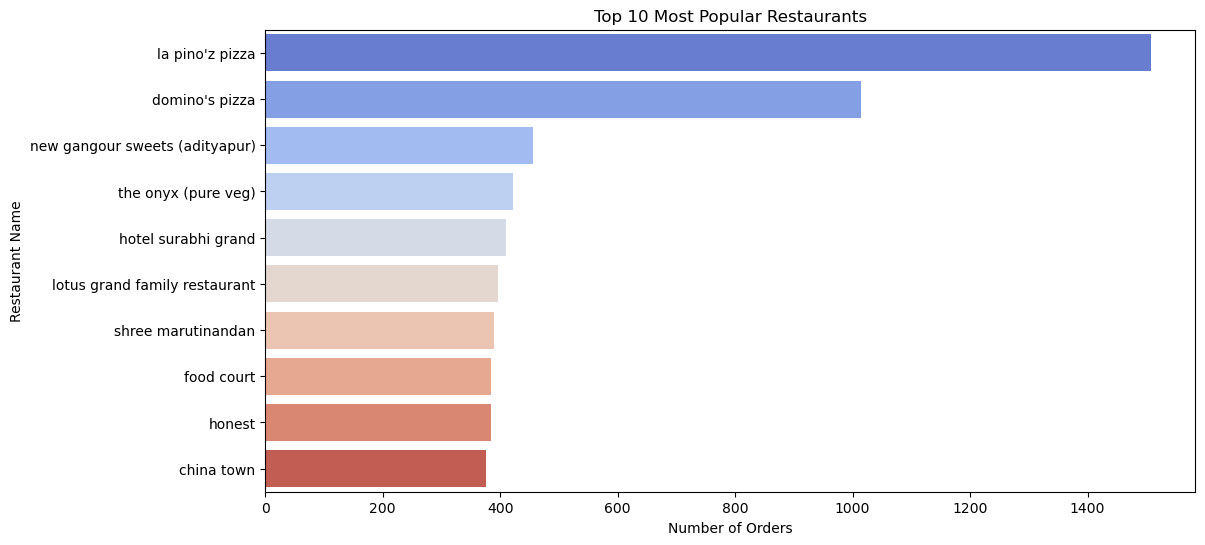

In [30]:
top_restaurants = df['restaurant_name'].value_counts().head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=top_restaurants.values, y=top_restaurants.index, palette="coolwarm")
plt.xlabel("Number of Orders")
plt.ylabel("Restaurant Name")
plt.title("Top 10 Most Popular Restaurants")
plt.show()

##  4.Customer Order Trends Over Time

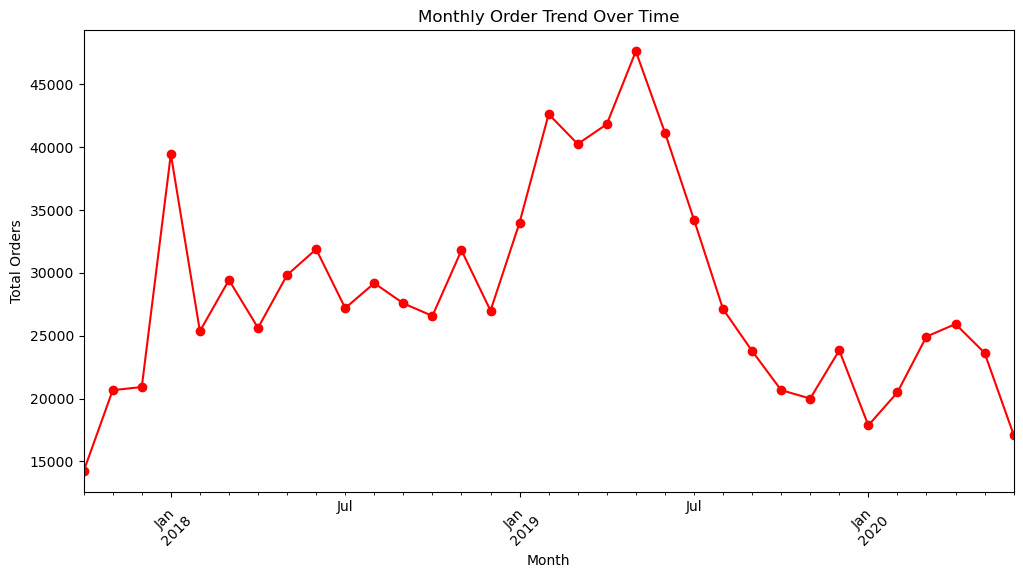

In [31]:
df['order_date'] = pd.to_datetime(df['order_date'])  # Ensure date format
df['month'] = df['order_date'].dt.to_period('M')  # Extract month & year

# Plot trends
plt.figure(figsize=(12,6))
df.groupby('month')['sales_qty'].sum().plot(marker='o', color='red')
plt.xlabel("Month")
plt.ylabel("Total Orders")
plt.title("Monthly Order Trend Over Time")
plt.xticks(rotation=45)
plt.show()

## 5.Do male & female customers prefer different food categories? 

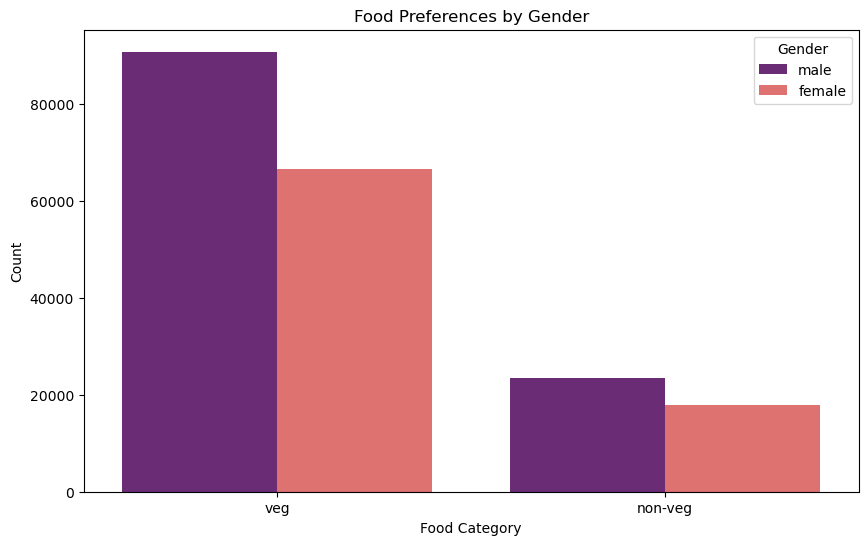

In [32]:
plt.figure(figsize=(10,6))
sns.countplot(x='veg_or_non_veg', hue='Gender', data=df, palette="magma")
plt.xlabel("Food Category")
plt.ylabel("Count")
plt.title("Food Preferences by Gender")
plt.show()

## 6. Effect of Ratings on Customer Choices

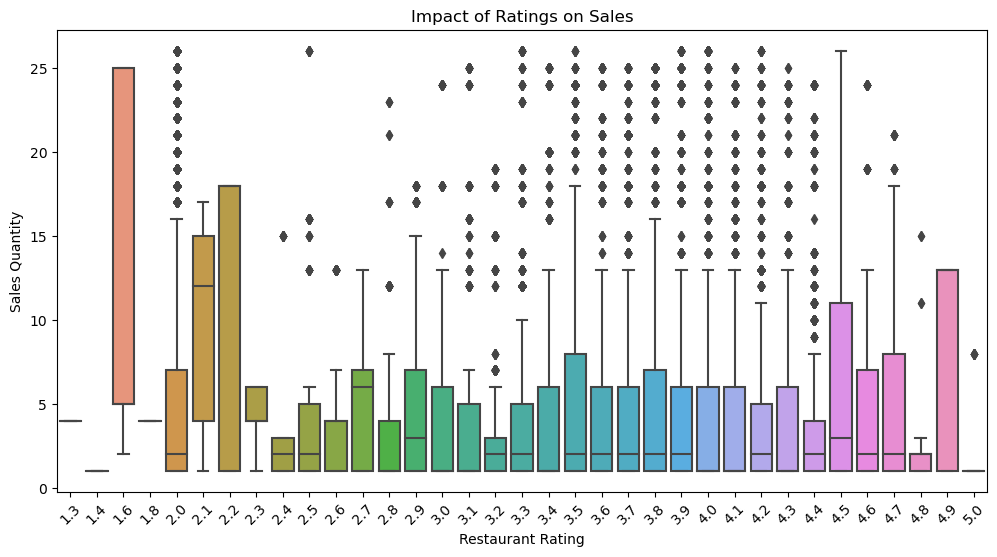

In [33]:
plt.figure(figsize=(12,6))
sns.boxplot(x='rating', y='sales_qty', data=df)
plt.xlabel("Restaurant Rating")
plt.ylabel("Sales Quantity")
plt.title("Impact of Ratings on Sales")
plt.xticks(rotation=45)
plt.show()

### created new columns such as year , month , day ...

In [34]:
df['year'] = df['order_date'].dt.year
df['month'] = df['order_date'].dt.month
df['day'] = df['order_date'].dt.day
df['weekday'] = df['order_date'].dt.day_name()
df['weekend'] = df['order_date'].dt.weekday >= 5  # True if Saturday or Sunday



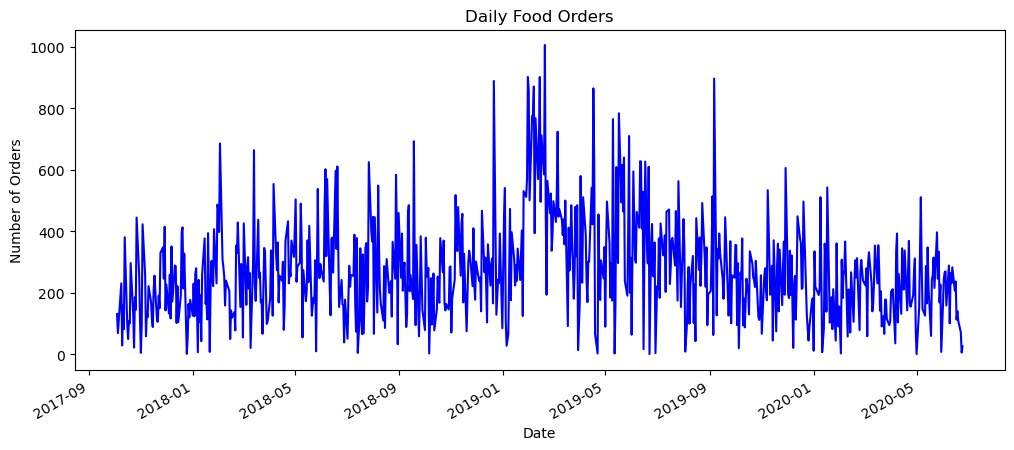

<Figure size 1200x500 with 0 Axes>

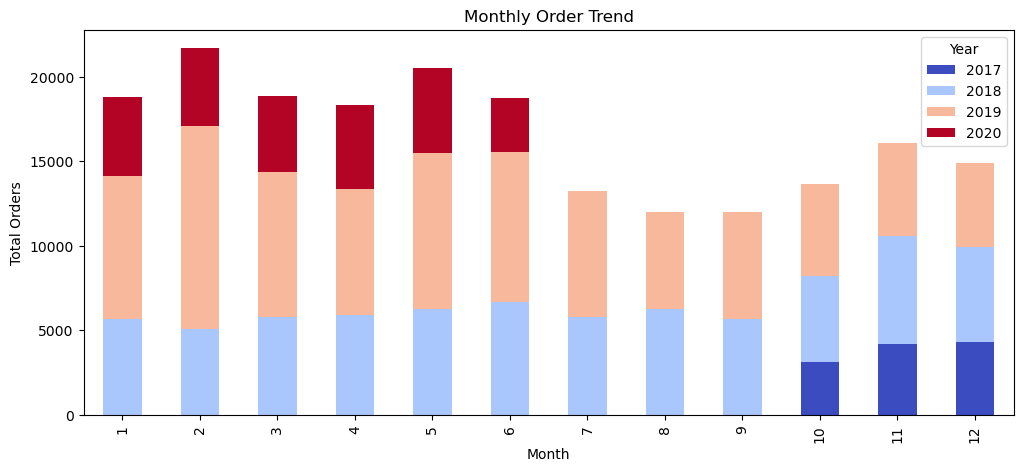

In [35]:
# Daily Orders
daily_orders = df.groupby('order_date').size()

plt.figure(figsize=(12,5))
daily_orders.plot(title="Daily Food Orders", color='blue')
plt.xlabel("Date")
plt.ylabel("Number of Orders")
plt.show()

# Monthly Orders
monthly_orders = df.groupby(['year', 'month']).size().unstack()

plt.figure(figsize=(12,5))
monthly_orders.T.plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(12,5))
plt.title("Monthly Order Trend")
plt.xlabel("Month")
plt.ylabel("Total Orders")
plt.legend(title="Year")
plt.show()


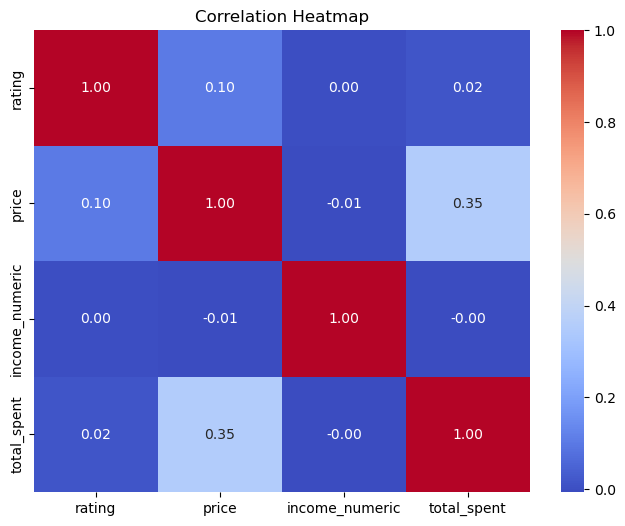

In [36]:
# Convert 'Monthly Income' into numerical bins for analysis
income_map = {
    "no income": 0,
    "less than 10000": 5000,
    "10000-25000": 17500,
    "25000-50000": 37500,
    "more than 50000": 60000
}
df['income_numeric'] = df['Monthly Income'].map(income_map)

# Correlation Matrix
correlation_columns = ['rating', 'price', 'income_numeric', 'total_spent']
corr_matrix = df[correlation_columns].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


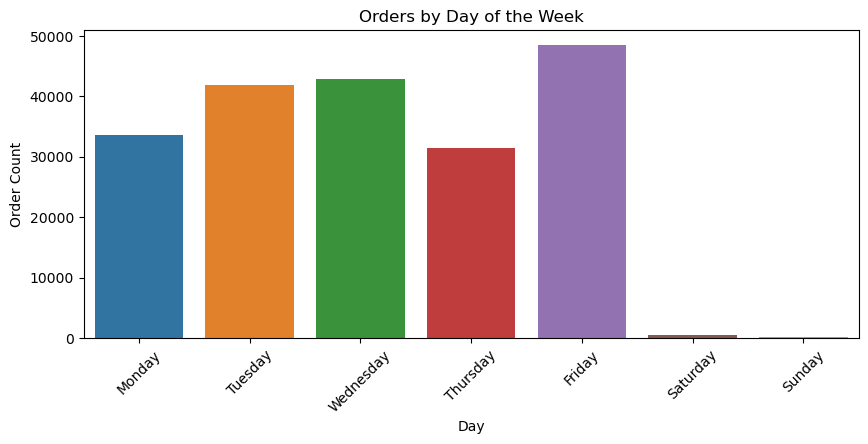

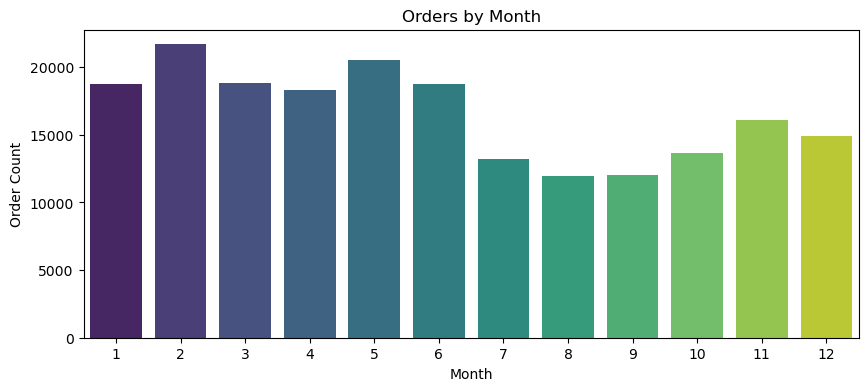

In [37]:
# Orders by Weekday
plt.figure(figsize=(10,4))
sns.countplot(data=df, x="weekday", order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title("Orders by Day of the Week")
plt.xlabel("Day")
plt.ylabel("Order Count")
plt.xticks(rotation=45)
plt.show()

# Orders by Month
plt.figure(figsize=(10,4))
sns.countplot(data=df, x="month", palette="viridis")
plt.title("Orders by Month")
plt.xlabel("Month")
plt.ylabel("Order Count")
plt.show()

### Create our target variable and done label encoding

In [38]:
# Total Orderrs per Restaurant per Day
df['daily_demand'] = df.groupby(['restaurant_name', 'order_date'])['order_date'].transform('count')


# Encode Categorical Variables (For ML Models)
df['city_encoded'] = df['city'].astype('category').cat.codes
df['restaurant_encoded'] = df['restaurant_name'].astype('category').cat.codes
df['food_encoded'] = df['food_item'].astype('category').cat.codes

# Display dataset with new features
df[['order_date', 'restaurant_name', 'daily_demand', 'city_encoded', 'food_encoded']].head(3)

,order_date,restaurant_name,daily_demand,city_encoded,food_encoded
1,2018-04-06,theka coffee desi,165,0,233
5,2019-08-01,picado international food,120,0,233
6,2019-02-08,sagar fast food,22,0,233


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 198772 entries, 1 to 261358
Data columns (total 30 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   user_id                     198772 non-null  int64         
 1   name                        198772 non-null  object        
 2   Age                         198772 non-null  int64         
 3   Gender                      198772 non-null  object        
 4   Marital Status              198772 non-null  object        
 5   Occupation                  198772 non-null  object        
 6   Monthly Income              198772 non-null  object        
 7   Educational Qualifications  198772 non-null  object        
 8   Family size                 198772 non-null  int64         
 9   order_date                  198772 non-null  datetime64[ns]
 10  sales_qty                   198772 non-null  int64         
 11  restaurant_name             198772 non-null 

### Drop unnecessary columns

In [40]:
drop_cols = ['user_id', 'name', 'Monthly Income', 'Educational Qualifications', 'Occupation','income_numeric']
df = df.drop(columns=drop_cols, errors='ignore')

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 198772 entries, 1 to 261358
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Age                 198772 non-null  int64         
 1   Gender              198772 non-null  object        
 2   Marital Status      198772 non-null  object        
 3   Family size         198772 non-null  int64         
 4   order_date          198772 non-null  datetime64[ns]
 5   sales_qty           198772 non-null  int64         
 6   restaurant_name     198772 non-null  object        
 7   city                198772 non-null  object        
 8   rating              198772 non-null  float64       
 9   rating_count        198772 non-null  object        
 10  price               198772 non-null  float64       
 11  food_item           198772 non-null  object        
 12  veg_or_non_veg      198772 non-null  object        
 13  Total_price         198772 non-nul

In [42]:
X = df[['month', 'weekday', 'weekend',  'restaurant_encoded', 'food_encoded', 'price', 'rating', 'city_encoded']]
y = df['daily_demand']  # Target variable

In [43]:
X = pd.get_dummies(X, drop_first=True)

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)


In [46]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, random_state=42)

In [47]:
y_pred = rf_model.predict(X_test)

In [48]:
from sklearn.metrics import mean_squared_error, r2_score

In [49]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [50]:
print(f"Random Forest Model Performance:")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

Random Forest Model Performance:
RMSE: 23.566652396687896
R² Score: 0.6171778837316655


In [51]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor(n_estimators=200, learning_rate=0.05, max_depth=10, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
print(f"XGBoost R² Score: {r2_score(y_test, y_pred_xgb)}")


XGBoost R² Score: 0.8928587521616368


In [52]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='r2')
print("Cross-validated R2 Score:", scores.mean())

Cross-validated R2 Score: 0.8895636875294356


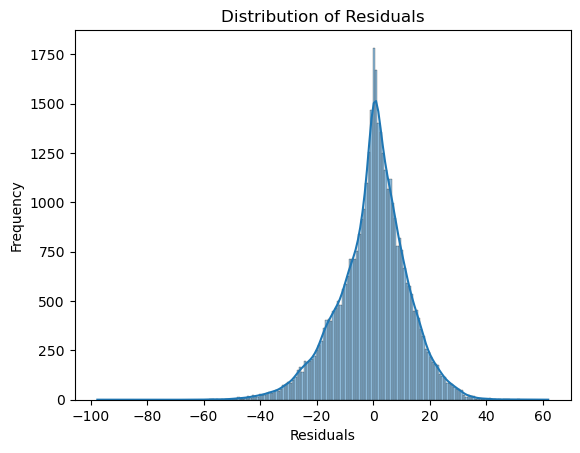

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

residuals = y_test - y_pred_xgb
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.show()

In [84]:
X_train['weekday'] = X_train['weekday'].astype('category')
X_test['weekday'] = X_test['weekday'].astype('category')

In [90]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

X =  df[['month', 'weekday_encoded', 'weekend',  'restaurant_encoded', 'food_encoded', 'price', 'rating', 'city_encoded']]
y = df['daily_demand']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

params = {
    'n_estimators': [100, 300, 500],
    'max_depth': [6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1]
}

model = GridSearchCV(XGBRegressor(random_state=42), params, cv=3, scoring='neg_root_mean_squared_error', n_jobs=-1)
model.fit(X_train, y_train)

print("Best Parameters:", model.best_params_)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 500}


In [91]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor(n_estimators=500, max_depth=10, learning_rate=0.1, reg_alpha=0.1, reg_lambda=0.1, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
print(f"XGBoost R² Score: {r2_score(y_test, y_pred_xgb)}")


XGBoost R² Score: 0.9723055602476266


In [92]:
from sklearn.metrics import r2_score

train_pred = xgb_model.predict(X_train)
test_pred = xgb_model.predict(X_test)

train_r2 = r2_score(y_train, train_pred)
test_r2 = r2_score(y_test, test_pred)

print(f"Train R² Score: {train_r2}")
print(f"Test R² Score: {test_r2}")


Train R² Score: 0.9904966859154739
Test R² Score: 0.9723055602476266


In [94]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='r2')
print("CV Mean R²:", scores.mean(), "CV Std:", scores.std())

CV Mean R²: 0.9690392886980688 CV Std: 0.0008458434009891846


In [93]:
import pandas as pd
correlation_matrix = pd.concat([X_train, y_train], axis=1).corr()
print(correlation_matrix["daily_demand"].squeeze().sort_values(ascending=False))

daily_demand          1.000000
rating                0.196220
price                 0.173326
restaurant_encoded    0.030167
food_encoded          0.013886
weekday_encoded       0.003561
weekend              -0.007695
month                -0.085382
city_encoded         -0.251810
Name: daily_demand, dtype: float64


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 198772 entries, 1 to 261358
Data columns (total 25 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Age                 198772 non-null  int64         
 1   Gender              198772 non-null  object        
 2   Marital Status      198772 non-null  object        
 3   Family size         198772 non-null  int64         
 4   order_date          198772 non-null  datetime64[ns]
 5   sales_qty           198772 non-null  int64         
 6   restaurant_name     198772 non-null  object        
 7   city                198772 non-null  object        
 8   rating              198772 non-null  float64       
 9   rating_count        198772 non-null  object        
 10  price               198772 non-null  float64       
 11  food_item           198772 non-null  object        
 12  veg_or_non_veg      198772 non-null  object        
 13  Total_price         198772 non-nul

In [88]:
weekday_mapping = {
    'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3,
    'Friday': 4, 'Saturday': 5, 'Sunday': 6
}

df['weekday_encoded'] = df['weekday'].map(weekday_mapping)


In [101]:
import pandas as pd

# Ensure the correct column order based on X_train
feature_order = ['month', 'weekday_encoded', 'weekend', 'restaurant_encoded', 'food_encoded', 'price', 'rating', 'city_encoded']

# Dictionary to map weekday names to encoded values
weekday_mapping = {
    "monday": 0, "tuesday": 1, "wednesday": 2, "thursday": 3, "friday": 4,
    "saturday": 5, "sunday": 6
}

def get_user_input():
    rating = float(input("Enter rating (e.g., 4.2): "))
    price = float(input("Enter price (e.g., 500): "))
    restaurant_encoded = int(input("Enter restaurant encoded value: "))
    food_encoded = int(input("Enter food encoded value: "))

    # Convert weekday string to encoded value
    while True:
        weekday_str = input("Enter weekday (e.g., Monday, Tuesday, ... Sunday): ").strip().lower()
        if weekday_str in weekday_mapping:
            weekday_encoded = weekday_mapping[weekday_str]
            break
        else:
            print("Invalid weekday! Please enter a valid day (e.g., Monday, Tuesday, etc.).")
    
    # Automatically determine weekend (0 for Monday-Friday, 1 for Saturday-Sunday)
    weekend = 1 if weekday_encoded in [5, 6] else 0  

    month = int(input("Enter month (1-12): "))
    city_encoded = int(input("Enter city encoded value: "))

    # Create DataFrame with correct column order
    input_data = pd.DataFrame([[month, weekday_encoded, weekend, restaurant_encoded, food_encoded, price, rating, city_encoded]],
                              columns=feature_order)
    
    return input_data

# Get user input
user_df = get_user_input()

# Predict daily demand using trained model
predicted_demand = xgb_model.predict(user_df)

# Display result
print(f"\nPredicted Daily Demand: {predicted_demand[0]}")


Enter rating (e.g., 4.2): 2
Enter price (e.g., 500): 200
Enter restaurant encoded value: 7716
Enter food encoded value: 1965
Enter weekday (e.g., Monday, Tuesday, ... Sunday): Monday
Enter month (1-12): 7
Enter city encoded value: 47

Predicted Daily Demand: 54.77979278564453


In [104]:
print(df.columns)


Index(['Age', 'Gender', 'Marital Status', 'Family size', 'order_date',
       'sales_qty', 'restaurant_name', 'city', 'rating', 'rating_count',
       'price', 'food_item', 'veg_or_non_veg', 'Total_price', 'total_spent',
       'month', 'year', 'day', 'weekday', 'weekend', 'daily_demand',
       'city_encoded', 'restaurant_encoded', 'food_encoded',
       'weekday_encoded'],
      dtype='object')
